In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('p3.csv',delim_whitespace=True)
df2 = pd.read_csv('p1.csv',delim_whitespace=True)
df3 = pd.read_csv('NGSA2.csv',delim_whitespace=True)

# MOBO = pd.read_csv('MOBO.csv', delim_whitespace=True)
MOBO = pd.read_csv('EHVI.csv', delim_whitespace=True)

SPEA2 = pd.read_csv('SPEA2.csv', delim_whitespace=True)
SMS_EMOA = pd.read_csv('SMS-EMOA2.csv', delim_whitespace=True)


from trieste.experimental.plotting import (
    plot_bo_points,
    plot_function_2d,
    plot_mobo_history,
    plot_mobo_points_in_obj_space,
)
from trieste.acquisition.multi_objective.pareto import (
    Pareto,
    get_reference_point,
)

from deap.tools._hypervolume.pyhv import hypervolume

In [12]:
'vos' not in [ 'vos']

False

In [13]:
df3_dat = (np.array([df3['col1'], df3['col2']])*1000).T
mobo_dat = (np.array([MOBO['col1'], MOBO['col2']])*1000).T
spea2_dat = (np.array([SPEA2['col1'], SPEA2['col2']])*1000).T
sms_dat = (np.array([SMS_EMOA['col1'], SMS_EMOA['col2']])*1000).T


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Obj 1', ylabel='Obj 2'>)

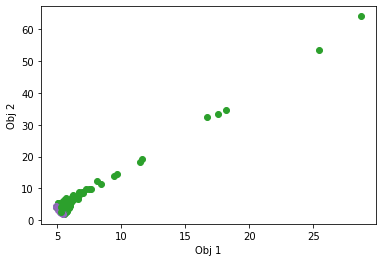

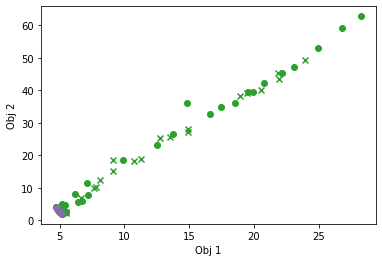

In [14]:
plot_mobo_points_in_obj_space(df3_dat, num_init=0)

# plt.xlim(4,6)
# plt.ylim(1,4)

plot_mobo_points_in_obj_space(mobo_dat, num_init=20)

# plt.xlim(4,6)
# plt.ylim(1,4)

(1.0, 4.0)

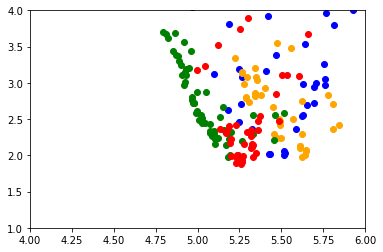

In [15]:
plt.scatter(df3_dat[:,0], df3_dat[:,1], color = 'b')
plt.scatter(spea2_dat[:,0], spea2_dat[:,1], color = 'orange')
plt.scatter(mobo_dat[:,0], mobo_dat[:,1], color = 'g')
plt.scatter(sms_dat[:,0], sms_dat[:,1], color = 'r')
plt.xlim(4,6)
plt.ylim(1,4)

In [16]:
hypervolume(np.array([[0.5,0],[0,0.5]]),np.array([1,1]))

c:\Users\sam\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:35: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "


0.75

In [17]:
ref_point = np.array([1,1])
mobo_dat_norm = mobo_dat.copy()
ngsa_dat_norm = df3_dat.copy()
spea2_dat_norm = spea2_dat.copy()
sms_dat_norm = sms_dat.copy()

x_max = np.max(ngsa_dat_norm[:,0])
y_max = np.max(ngsa_dat_norm[:,1])
mobo_dat_norm[:,0] = mobo_dat_norm[:,0]/x_max
mobo_dat_norm[:,1] = mobo_dat_norm[:,1]/y_max

ngsa_dat_norm[:,0] = ngsa_dat_norm[:,0]/x_max
ngsa_dat_norm[:,1] = ngsa_dat_norm[:,1]/y_max

spea2_dat_norm[:,0] = spea2_dat_norm[:,0]/x_max
spea2_dat_norm[:,1] = spea2_dat_norm[:,1]/y_max

sms_dat_norm[:,0] = sms_dat_norm[:,0]/x_max
sms_dat_norm[:,1] = sms_dat_norm[:,1]/y_max

mobo_hv_list = []
ngsa_hv_list = []
spea2_hv_list = []
sms_hv_list = []

for i in range(df3_dat.shape[0]):

    try:
        mobo_hv = hypervolume(mobo_dat_norm.copy()[:i+1],ref_point) 
        mobo_hv_list.append(mobo_hv)
    except IndexError:
        pass

    ngsa_hv = hypervolume(ngsa_dat_norm.copy()[:i+1],ref_point) 
    ngsa_hv_list.append(ngsa_hv)

    spea2_hv = hypervolume(spea2_dat_norm.copy()[:i+1],ref_point) 
    spea2_hv_list.append(spea2_hv)

    sms_hv = hypervolume(sms_dat_norm.copy()[:i+1],ref_point) 
    sms_hv_list.append(sms_hv)

mobo_hv = np.array(mobo_hv_list)
ngsa_hv = np.array(ngsa_hv_list)
spea2_hv = np.array(spea2_hv_list)
sms_hv = np.array(sms_hv_list)

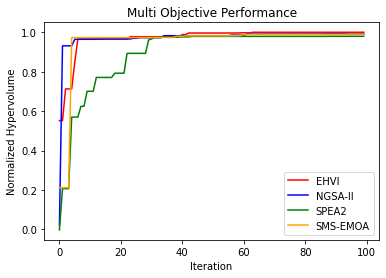

In [23]:
plt.plot((mobo_hv/np.max(mobo_hv)), label = 'EHVI', color = 'r')
plt.plot((ngsa_hv/np.max(mobo_hv)), label = 'NGSA-II', color = 'b')
plt.plot((spea2_hv/np.max(mobo_hv)), label = 'SPEA2', color = 'g')
plt.plot((sms_hv/np.max(mobo_hv)), label = 'SMS-EMOA', color = 'orange')
plt.title('Multi Objective Performance')
plt.ylabel('Normalized Hypervolume')
plt.xlabel('Iteration')
plt.legend(loc = 4)
# plt.ylim(0.9,1.01)

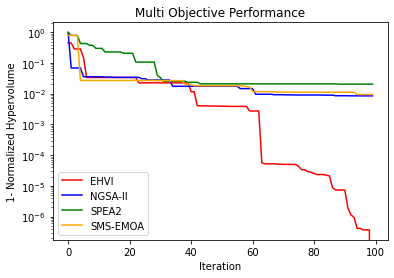

In [29]:
plt.plot((1-mobo_hv/np.max(mobo_hv)), label = 'EHVI', color = 'r')
plt.plot((1-ngsa_hv/np.max(mobo_hv)), label = 'NGSA-II', color = 'b')
plt.plot((1-spea2_hv/np.max(mobo_hv)), label = 'SPEA2', color = 'g')
plt.plot((1-sms_hv/np.max(mobo_hv)), label = 'SMS-EMOA', color = 'orange')
plt.title('Multi Objective Performance')
plt.ylabel('1- Normalized Hypervolume')
plt.xlabel('Iteration')
plt.legend(loc = 3)
plt.yscale('log')

<ipython-input-19-2e4a7212fd45>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(1-mobo_hv/np.max(mobo_hv)), label = 'EHVI', color = 'r')


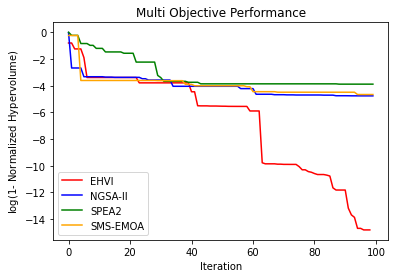

In [19]:
plt.plot(np.log(1-mobo_hv/np.max(mobo_hv)), label = 'EHVI', color = 'r')
plt.plot(np.log(1-ngsa_hv/np.max(mobo_hv)), label = 'NGSA-II', color = 'b')
plt.plot(np.log(1-spea2_hv/np.max(mobo_hv)), label = 'SPEA2', color = 'g')
plt.plot(np.log(1-sms_hv/np.max(mobo_hv)), label = 'SMS-EMOA', color = 'orange')
plt.title('Multi Objective Performance')
plt.ylabel('$\log$(1- Normalized Hypervolume)')
plt.xlabel('Iteration')
plt.legend(loc = 3)
plt.yscale('linear')

In [24]:
def plot_pareto_frontier(Xs, Ys,name, index,  maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    colors = ['r', 'b', 'g','orange']
    '''Plotting process'''
    plt.scatter(Xs,Ys, color = colors[index], alpha= 0.2, s=10)#, label = f'{name}')
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.scatter(pf_X, pf_Y, color = colors[index])
    plt.plot(pf_X, pf_Y, color = colors[index], label = f'{name}')
    print(len(pf_X))
    plt.legend()



24
10
13
8


(1.0, 6.0)

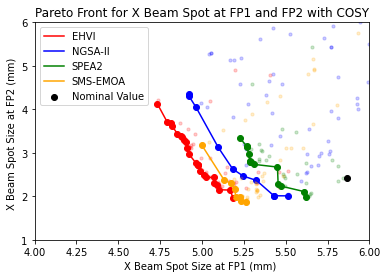

In [25]:
plot_pareto_frontier(mobo_dat[:,0], mobo_dat[:,1],name = 'EHVI', index= 0, maxX= False, maxY= False)

plot_pareto_frontier(df3_dat[:,0], df3_dat[:,1],name = 'NGSA-II',index= 1, maxX= False, maxY= False)

plot_pareto_frontier(spea2_dat[:,0], spea2_dat[:,1],name = 'SPEA2',index= 2, maxX= False, maxY= False)

plot_pareto_frontier(sms_dat[:,0], sms_dat[:,1],name = 'SMS-EMOA',index= 3, maxX= False, maxY= False)

plt.title('Pareto Front for X Beam Spot at FP1 and FP2 with COSY')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.scatter(0.005868*1000,	0.00242383*1000, color = 'black', label = 'Nominal Value')
plt.legend()
plt.xlim(4,6)
plt.ylim(1,6)

In [10]:
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)
plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')
#plt.scatter(df['col1'][0]*1000,df['col2'][0]*1000, label = 'Initial Soultion')

plot_pareto_frontier(df2['col1']*1000,df2['col2']*1000,maxX=False,maxY=False)
# plt.scatter(df2['col1'][0]*1000,df2['col2'][0]*1000, label = 'Initial Soultion')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(0,20)
plt.ylim(0,10)
plt.legend()

TypeError: plot_pareto_frontier() missing 2 required positional arguments: 'name' and 'index'

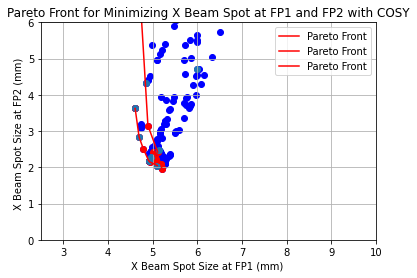

In [ ]:
plot_pareto_frontier(df3['col1']*1000,df3['col2']*1000,maxX=False,maxY=False)
plot_pareto_frontier(df2['col1']*1000,df2['col2']*1000,maxX=False,maxY=False)
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)

plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')

plt.scatter(df3['col1'].iloc[90:]*1000, df3['col2'].iloc[90:]*1000)
plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(2.5,10)
plt.ylim(0,6)
plt.legend()

In [ ]:
fp1 = list(df['col1']) + list(df2['col1']) +list(df3['col1'])
fp2 = list(df['col2']) + list(df2['col2']) +list(df3['col2'])
# fp1 = np.array(fp1)
# fp2 = np.array(fp2)

In [14]:
dataa = np.array([fp1, fp2])

In [19]:
data = dataa.T
data = data*1000

(1.0, 4.0)

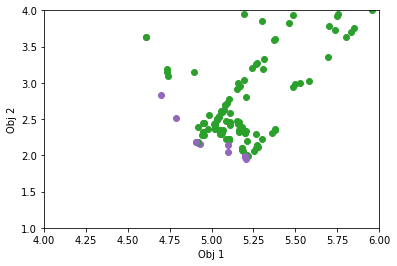

In [23]:
plot_mobo_points_in_obj_space(data, num_init=20)
plt.xlim(4,6)
plt.ylim(1,4)

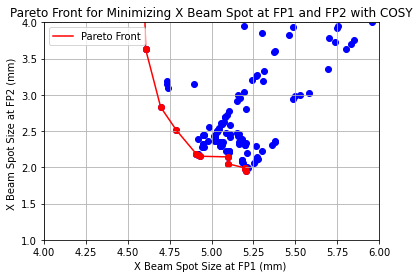

In [6]:
plot_pareto_frontier(fp1*1000,fp2*1000,maxX=False,maxY=False)


plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(4,6)
plt.ylim(1,4)
plt.legend()

In [7]:
df4 = pd.read_csv('p4.csv',delim_whitespace=True)

(0.0, 10.0)

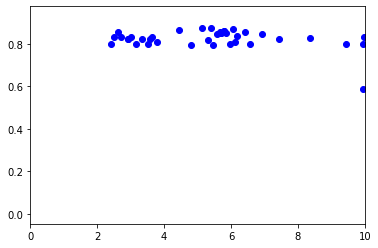

In [8]:
plot_pareto_frontier(df4['col1']*1000,df4['col2'],maxX=False,maxY=True)
plt.xlim(0,10)


(1.0, 5.0)

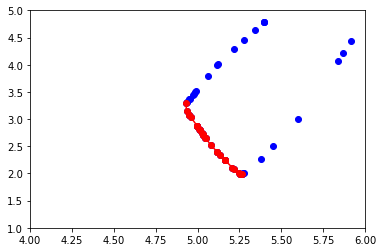

In [9]:
df5 = pd.read_csv('p5.csv',delim_whitespace=True)
plot_pareto_frontier(df5['col1']*1000,df5['col2']*1000,maxX=False,maxY=False)
plt.xlim(4,6)
plt.ylim(1,5)

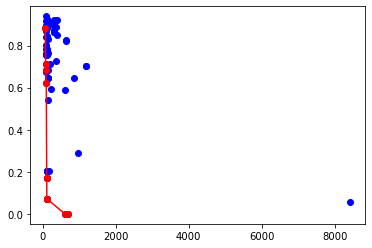

In [10]:
df6 = pd.read_csv('p6.csv',delim_whitespace=True)
plot_pareto_frontier(df6['col1']*1000,df6['col2'],maxX=False,maxY=False)